I will play here.

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import numpy as np
from PIL import Image
import re
import collections
import nltk.tokenize
import pandas as pd
import pickle
import seaborn as sns

In [ ]:
path = '/work/data/stopwords/stopwords.txt'

with open(path) as file:
    stopwords = [line.rstrip() for line in file]

In [ ]:
dataset = open("/work/data/tweeteval/datasets/hate/train_text.txt").read()
extension = ['user', 'with', 'this', 'that', 'their', 'time', 'This', 'about', 'these', 'just', 'them', 'then', 'like', 'over', 'more', 'they', 'also', 'even','here', 'some', 'from', 'your', 'what', 'there', 'want', ' When', 'than', 'have', 'make', 'into', "you're", "don't", "will", "When", "only", "take"]

stopwords.extend(extension)


In [ ]:
len(stopwords)

1334

(-0.5, 1199.5, 999.5, -0.5)

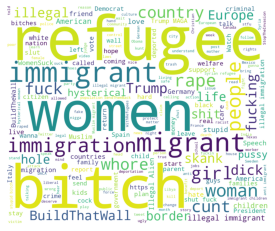

In [ ]:
wordcloud = WordCloud(background_color = 'white',
                        width = 1200,
                        height = 1000, stopwords=stopwords, min_word_length = 4).generate(dataset)

plt.imshow(wordcloud)
plt.axis('off')

#regexp will use later

In [ ]:
def wordcloud(data, stopwords):
    # Set figure size
    my_mask = np.array(Image.open('/work/data/misc/Twitter.png'))
    wordcloud = WordCloud(width = 10000, height = 10000, random_state=1, background_color='white',
                        collocations=False, mask=my_mask, contour_width=3, contour_color='#1DA1F2', stopwords=stopwords, min_word_length = 4).generate(data)
    # Display image
    plt.figure(figsize=(20, 20))
    plt.axis("off")
    plt.tight_layout(pad=0)
    plt.imshow(wordcloud, interpolation='bilinear')
    # plt.savefig('wordcloud.png', facecolor='k', bbox_inches='tight')
    with open("data/Output.svg", "w") as text_file:
        text_file.write(wordcloud.to_svg())
    
    # wordcloud.to_file("wordcloud1.png")

In [ ]:
wordcloud(dataset, stopwords)


FileNotFoundError: [Errno 2] No such file or directory: '/work/data/misc/Twitter.png'

In [ ]:

tok = nltk.tokenize.TreebankWordTokenizer()
corpus = []
with open('data/train_text.txt', 'r') as f:
    for line in f:
        corpus.extend(t for line in f for t in tok.tokenize(line))
with open('data/train_text-list.pkl', 'wb') as f:
    pickle.dump(corpus, f)

FileNotFoundError: [Errno 2] No such file or directory: 'data/train_text.txt'

In [ ]:


with open('data/train_text-list.pkl', 'rb') as f:
    corpus = pickle.load(f)

voc = collections.Counter(corpus)
frq = pd.DataFrame(voc.most_common(), columns=['token', 'frequency'])

# Index in the sorted list
frq['idx'] = frq.index + 1

# Frequency normalised by corpus size
frq['norm_freq'] = frq.frequency / len(corpus)

# Cumulative normalised frequency
frq['cumul_frq'] = frq.norm_freq.cumsum()

sns.set_theme(style='whitegrid')

# Plot: Cumulative frequency by index
sns.relplot(x='idx', y='cumul_frq', data=frq)
plt.show()

# Plot: Cumulative frequency by index, top 10000 tokens
sns.relplot(x='idx', y='cumul_frq', data=frq[:10000], kind='line')
plt.show()

# Plot: Log-log plot for Zipf's law
frq['log_frq'] = np.log(frq.frequency)
frq['log_rank'] = np.log(frq.frequency.rank(ascending=False))
sns.relplot(x='log_rank', y='log_frq', data=frq)
plt.show()

pass

FileNotFoundError: [Errno 2] No such file or directory: 'data/train_text-list.pkl'

In [ ]:
#i will play here
dct = dict(zip(frq.token, frq.frequency))

dct = {key:value for key, value in dct.items() if key not in stopwords}
new_dct = {key:value for key, value in dct.items() if len(key) > 3}

trimmed_dct = {key:value for key, value in new_dct.items() if value > 250}





NameError: name 'frq' is not defined

In [ ]:
plt.bar(trimmed_dct.keys(), trimmed_dct.values())
plt.xticks(rotation = 90);

NameError: name 'trimmed_dct' is not defined

In [ ]:
from work.boilerplate import load_and_tokenize

load_and_tokenize("/work/data/tweeteval/datasets/hate/train_text.txt", "NLTKTweet")

[['@user',
  'nice',
  'new',
  'signage',
  '.',
  'Are',
  'you',
  'not',
  'concerned',
  'by',
  'Beatlemania',
  '-',
  'style',
  'hysterical',
  'crowds',
  'crongregating',
  'on',
  'you',
  '…'],
 ['A',
  'woman',
  'who',
  'you',
  'fucked',
  'multiple',
  'times',
  'saying',
  'yo',
  'dick',
  'small',
  'is',
  'a',
  'compliment',
  'you',
  'know',
  'u',
  'hit',
  'that',
  'spot',
  '😎'],
 ['@user',
  '@user',
  'real',
  'talk',
  'do',
  'you',
  'have',
  'eyes',
  'or',
  'were',
  'they',
  'gouged',
  'out',
  'by',
  'a',
  'rapefugee',
  '?'],
 ['your',
  'girlfriend',
  'lookin',
  'at',
  'me',
  'like',
  'a',
  'groupie',
  'in',
  'this',
  'bitch',
  '!'],
 ['Hysterical', 'woman', 'like', '@user'],
 ['Me', 'flirting', '-', 'So', 'tell', 'me', 'about', 'your', 'father', '...'],
 ['The',
  'Philippine',
  'Catholic',
  'bishops',
  "'",
  'work',
  'for',
  'migrant',
  'workers',
  'should',
  'focus',
  'on',
  'families',
  'who',
  'are',
  '"',
 

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=bf1f20fb-a6c0-4ea2-8567-a5a41eea1d8a' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>